In [12]:
#Classify data from DB here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# df = pd.read_csv('data.csv', header = None)
# df.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]
# df = df.drop("class", axis = 1)
# df.to_csv("noclass.csv", index = False, header=False)

df = pd.read_csv('noclass.csv')

labels = []
for i in df.index:
    lightState = int(df.iloc[i,5])
    airconState = int(df.iloc[i,6])
    if airconState == 0 and lightState == 0:
        label = "nanl"
    elif airconState == 0 and lightState == 1:
        label = "nagl"
    elif airconState == 1 and lightState == 0: 
        label = "ganl"
    elif airconState == 1 and lightState == 1:
        label = "gagl"
    labels.append(label)

df.insert(9,"class", labels, True)

df.to_csv("post.csv", index = False)


In [13]:

df = pd.read_csv('post.csv', header= None)
df.head()
#day of week, time, temperature, humidity, light on/off, aircon on/off, aircon temp, room, class
df.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]

# tentatively reduced to 5 features for POC
y = df['class']
X = df.drop('class', axis = 1)
# X = X.drop('hour', axis = 1)
X = X.drop('minute', axis = 1)
X = X.drop('light_state', axis = 1)
X = X.drop('aircon_state', axis = 1)
X = X.drop('aircon_temp', axis = 1)
X = X.drop('room', axis = 1)
X = X.drop('humidity', axis = 1)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 100)

# Scalers improved the accuracy but don't really know how to use it on the individual datas to test yet
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0    0    1    0]
 [   0   58 1065 1086   58]
 [   0  236 9750  138  464]
 [   0  183  197 9348   81]
 [   0   68 1804 1054  214]]


C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       class       0.00      0.00      0.00         1
        gagl       0.11      0.03      0.04      2267
        ganl       0.76      0.92      0.83     10588
        nagl       0.80      0.95      0.87      9809
        nanl       0.26      0.07      0.11      3140

    accuracy                           0.75     25805
   macro avg       0.39      0.39      0.37     25805
weighted avg       0.66      0.75      0.69     25805



C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
from sklearn import tree
from sklearn.metrics import accuracy_score

error = []
trainAcc = []
testAcc = []

# Calculating error for K values between 1 and 40
for i in range(1, 265,4):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    Y_predTrain = knn.predict(X_train)
    Y_predTest = knn.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

KeyboardInterrupt: 

Text(0, 0.5, 'Accuracy')

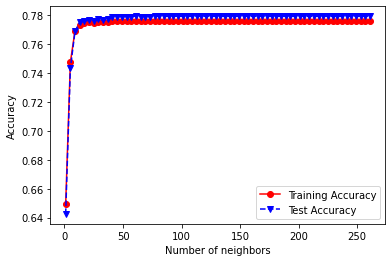

In [ ]:
plt.plot(range(1, 265,4), trainAcc, 'ro-', range(1, 265,4), testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0  1171  1039     5]
 [    0 10360   119    34]
 [    0   232  9650     1]
 [    0  2092  1084    18]]


C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        gagl       0.00      0.00      0.00      2215
        ganl       0.75      0.99      0.85     10513
        nagl       0.81      0.98      0.89      9883
        nanl       0.31      0.01      0.01      3194

    accuracy                           0.78     25805
   macro avg       0.47      0.49      0.44     25805
weighted avg       0.65      0.78      0.69     25805



C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data.csv')

#day of week, time, temperature, humidity, light on/off, aircon on/off, aircon temp, room, class
df.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]

# tentatively reduced to 5 features for POC
y = df['class']
X = df.drop('class', axis = 1)
# X = X.drop('hour', axis = 1)
X = X.drop('minute', axis = 1)
X = X.drop('light_state', axis = 1)
X = X.drop('aircon_state', axis = 1)
X = X.drop('aircon_temp', axis = 1)
X = X.drop('room', axis = 1)
X = X.drop('humidity', axis = 1)

X

,day,hour,temperature
0,5,0,29.0
1,5,0,28.0
2,5,0,29.0
3,5,0,27.0
4,5,0,27.5
...,...,...,...
129018,4,23,31.0
129019,4,23,28.5
129020,4,23,28.5
129021,4,23,30.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Scalers improved the accuracy but don't really know how to use it on the individual datas to test yet
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    3  1095  1042    38]
 [   15 10169   111   259]
 [    0   192  9687    21]
 [    0  1932  1081   160]]
              precision    recall  f1-score   support

        gagl       0.17      0.00      0.00      2178
        ganl       0.76      0.96      0.85     10554
        nagl       0.81      0.98      0.89      9900
        nanl       0.33      0.05      0.09      3173

    accuracy                           0.78     25805
   macro avg       0.52      0.50      0.46     25805
weighted avg       0.68      0.78      0.70     25805



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# proof of concept below
ganl = classifier.predict([[6,10,32.0]])
print(ganl)

nagl = classifier.predict([[2,10,25.0]])
print(nagl)

nanl = classifier.predict([[3,13,18.0]])
print(nanl)

gagl = classifier.predict([[5,22,35.0]])
print(gagl)

nanl = classifier.predict([[3,12,27.0]])
print(nanl)

nanl = classifier.predict([[3,12,27.0]])
print(nanl)

['nanl']
['nagl']
['nagl']
['ganl']
['ganl']
['ganl']


C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\xuezh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with featur

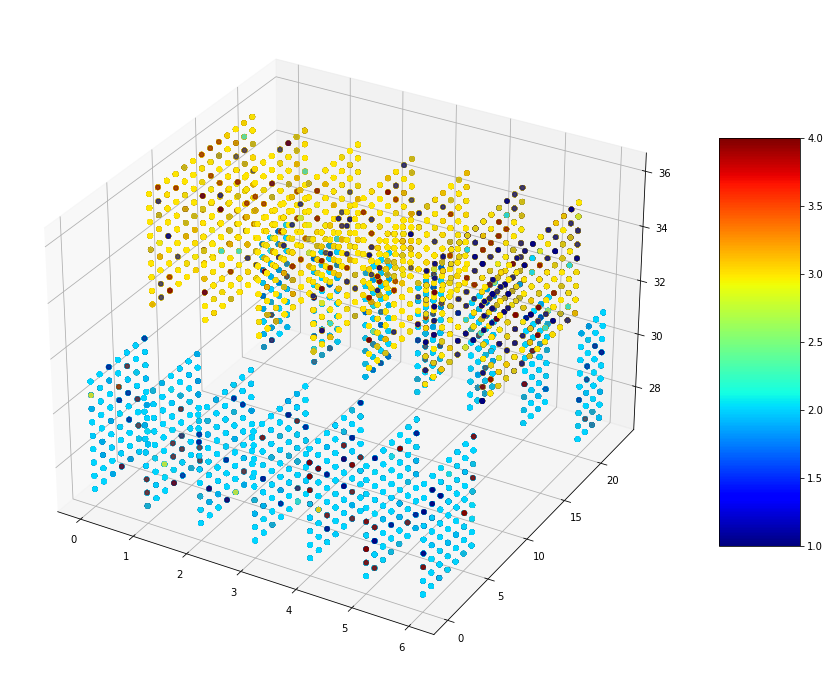

In [ ]:
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection ="3d")
y_train.replace({"nanl": 1,"nagl": 2,"ganl": 3,"gagl": 4},inplace= True)
sctt = ax.scatter3D(X_train["day"], X_train["hour"], X_train["temperature"],c =y_train , cmap='jet')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

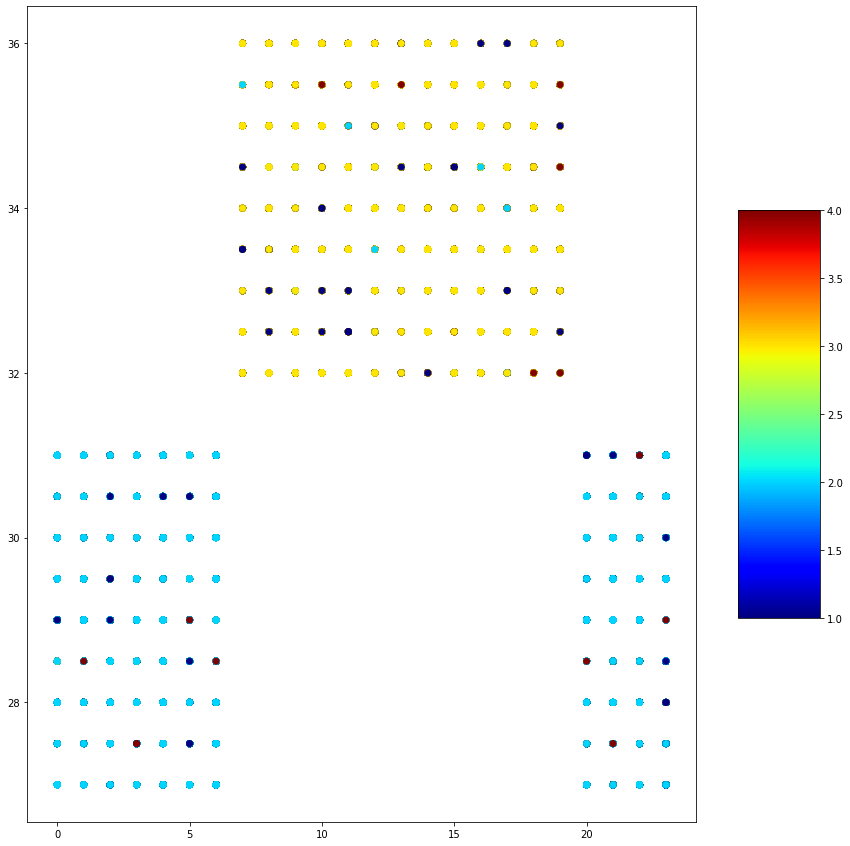

In [ ]:
fig = plt.figure(figsize = (15, 15))
ax = plt.axes()
y_train.replace({"nanl": 1,"nagl": 2,"ganl": 3,"gagl": 4},inplace= True)
sctt = ax.scatter(X_train["hour"], X_train["temperature"],c =y_train , cmap='jet')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

In [ ]:
trainCheck = []
testCheck = []
for i in range(1,20):
    trainCheck.append(trainAcc[i] - testAcc[i])

# print(trainAcc)
# print(testAcc)
print(trainCheck)

[0.004612473464952083, 0.001242921411325093, 0.0001283368952956776, -0.00015215448706695778, -0.0004990795670591908, -0.0007057590988964746, -0.0010526858952037976, -0.000930891021259983, -0.0016911808859773059, -0.0018757173775514335, -0.001753923075712649, -0.0021377592299131054, -0.0021193051230716797, -0.0017280876693975822, -0.0020750158959677023, -0.0020085827704431347, -0.002163593492018001, -0.0022078824330693525, -0.0025621928172706587]


In [ ]:
for i in range(1, 265,4):
    print(i)

1
5
9
13
17
21
25
29
33
37
41
45
49
53
57
61
65
69
73
77
81
85
89
93
97
101
105
109
113
117
121
125
129
133
137
141
145
149
153
157
161
165
169
173
177
181
185
189
193
197
201
205
209
213
217
221
225
229
233
237
241
245
249
253
257
261
